In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from missingno import matrix

In [10]:
from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [11]:
import os
print(os.getcwd())


c:\Users\TYS\Documents\study\Master\INSY669 Text Analytics\individual assignment\ADZUNA-FEATURED-PREDICTION-COMPETITION


In [12]:
from pathlib import Path
file_path = Path("../data/Train_rev1.csv")
print(file_path.exists())


True


In [13]:
df = load_data("Train_rev1.csv")
sub_df = df.sample(n=2500, random_state=42)  # Adjust random_state for reproducibility
sub_df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
30390,68062598,Business Account Manager,Business Account Manager Plumbing Heating Pro...,South West,South West London,NaN,permanent,BMS Sales Specialists,Sales Jobs,"22000 - 25000 per annum + Car,Mobile,Pension,L...",23500,totaljobs.com
108709,69622111,Staff Nurse RGN/RMN Newtown Abbey Nights Ne...,Job Title; Staff Nurse RGN/RMN â NightsLocat...,Newtownabbey,Newtownabbey,full_time,NaN,Regional Recruitment Services,Healthcare & Nursing Jobs,12.00/Hour,23040,staffnurse.com
13924,66664026,Community Fundraising Manager,This dynamic international development charity...,London,London,full_time,permanent,TPP Not for Profit,Charity & Voluntary Jobs,33300 - 36400 per annum,34850,Third Sector Jobs
154606,71015241,Conveyancing Executive,Large regional law firm require a residential ...,Hampshire,Hampshire,full_time,permanent,PTP Consulting,Legal Jobs,"From 18,000 to 27,000 per year",22500,TotallyLegal
172891,71428553,Investment Compliance Analyst,This individual will work closely with the bus...,London South East,South East London,NaN,permanent,Michael Page Financial Services,Accounting & Finance Jobs,50000 to 60000 per annum,55000,totaljobs.com
...,...,...,...,...,...,...,...,...,...,...,...,...
71198,68834611,This Boutique Hotel is currently looking for a...,This Boutique Hotel is currently looking for a...,Devon South West,Devon,NaN,NaN,EMP Recruitment,Hospitality & Catering Jobs,"From 26,000 to 30,000 per annum excellent bene...",28000,caterer.com
214477,72239809,Electrical Projects Engineer / ****k,Electrical / Facilities Engineer / Havant / up...,Havant Hampshire South East,Havant,NaN,permanent,Jenrick Engineering,Engineering Jobs,33000 - 41000 per annum + pension + holidays,37000,totaljobs.com
132982,70231771,Commercial Gas Engineer,This is the ideal role for a Gas Safe register...,"Dorset, South West",Dorset,NaN,permanent,NaN,Trade & Construction Jobs,30000 per annum,30000,jobs.telegraph.co.uk
63578,68704463,Workspace Facilities Coordinator,A large FTSE 250 UK Facilities Management busi...,Manchester Lancashire North West,UK,NaN,permanent,Omni Resource Management Solutions.,Engineering Jobs,22000 per annum + pension and other benefits,22000,totaljobs.com


<AxesSubplot: >

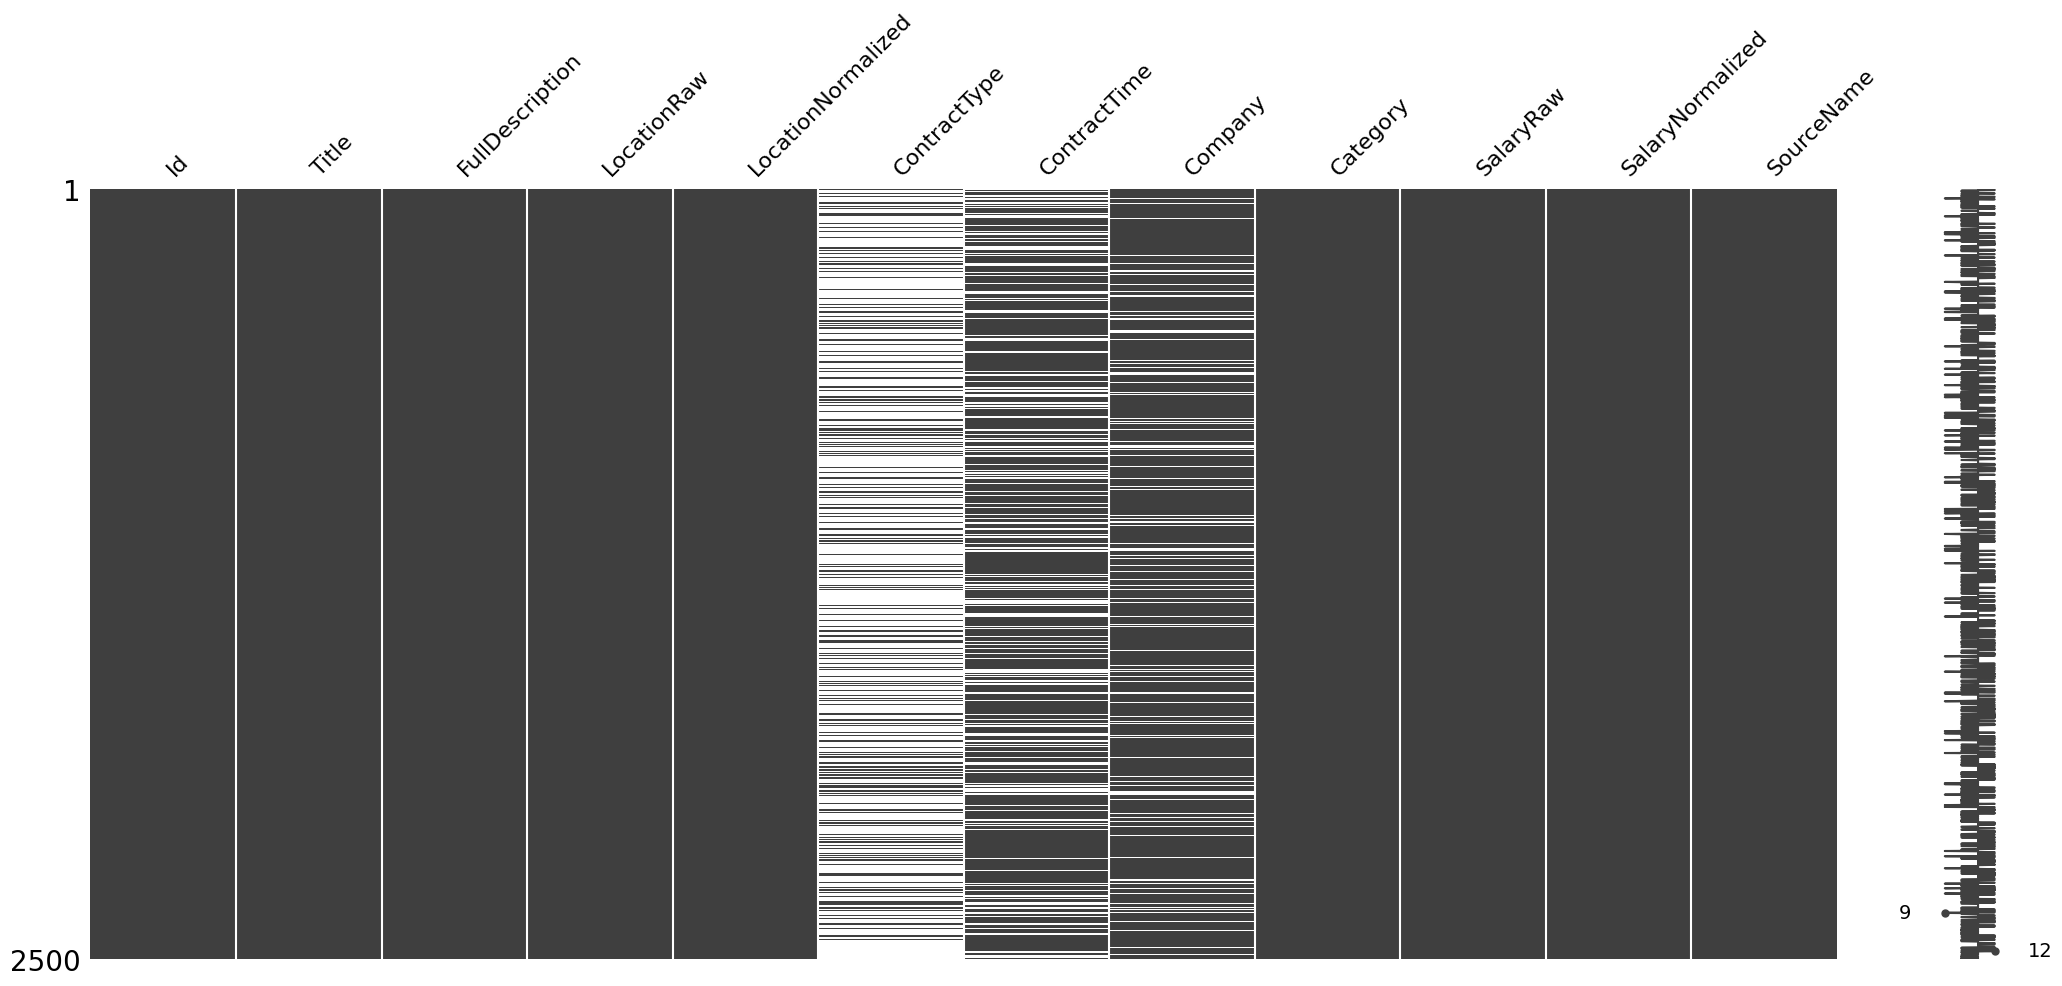

In [14]:
matrix(sub_df)

In [15]:
sub_df.isnull().sum()

Id                       0
Title                    0
FullDescription          0
LocationRaw              0
LocationNormalized       0
ContractType          1815
ContractTime           641
Company                343
Category                 0
SalaryRaw                0
SalaryNormalized         0
SourceName               0
dtype: int64

In [16]:
sub_df.dropna(subset=["ContractTime","ContractType","Company"],inplace=True)